In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from flask import Flask, request, jsonify

In [2]:
# Conduct Exploratory Data Analysis (EDA)
def explore_data(data):
    # Print the first few rows of the dataset
    print(data.head())

    # Get summary statistics of the dataset
    print(data.info())
    print(data.describe())

    # Visualize correlation heatmap
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Features')
    plt.show()

    # Check for missing values
    print(data.isnull().sum())

   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0  

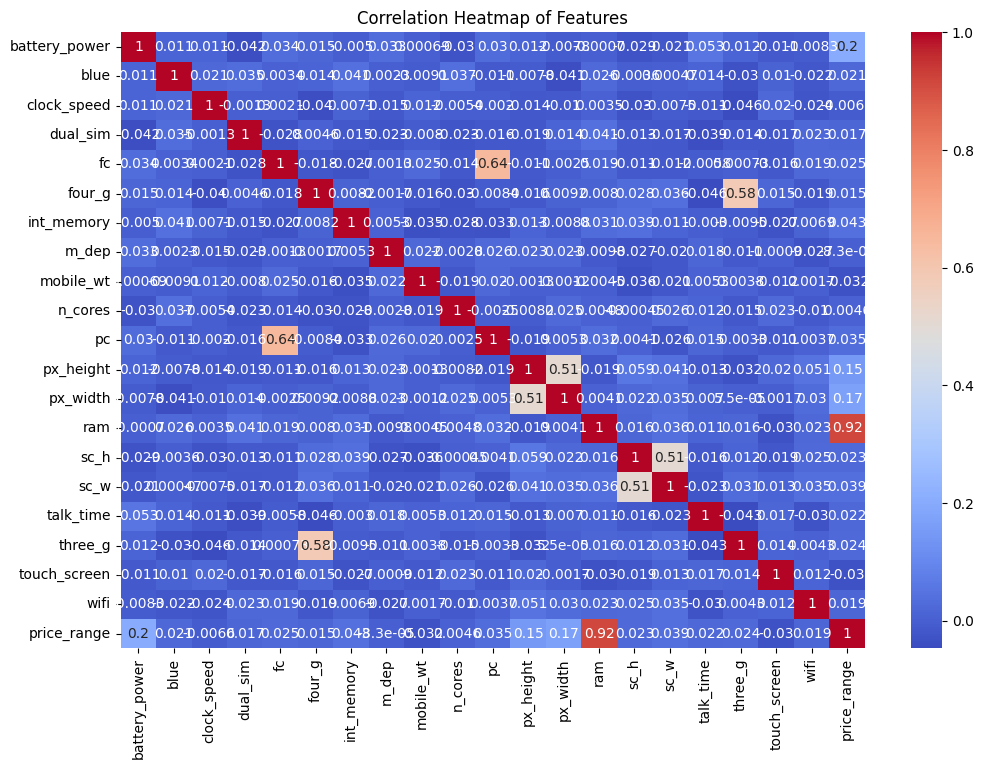

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [4]:
# Step 1: Data Preparation and EDA

# Load the dataset
train_data = pd.read_csv("/train - train.csv")
test_data = pd.read_csv("/test - test.csv")

explore_data(train_data)

In [5]:
# Handle missing values
train_data.fillna(train_data.mean(), inplace=True)

In [6]:
# Convert categorical columns (e.g., blue, dual_sim, four_g, three_g, touch_screen, wifi) to numerical format using one-hot encoding.
# One-hot encode categorical columns
train_data = pd.get_dummies(train_data, columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'])

In [12]:
# Model Training
def train_model(data):
    X = data.drop('price_range', axis=1)
    y = data['price_range']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model, X_train, X_val, y_train, y_val

In [13]:
model, X_train, X_val, y_train, y_val = train_model(train_data)

In [14]:
# Step 3: Model Evaluation

# Model Evaluation
def evaluate_model(model, X_val, y_val):
    # Evaluate the model
    y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print classification report
    print(classification_report(y_val, y_pred))

    # Print confusion matrix
    print(confusion_matrix(y_val, y_pred))

In [15]:
evaluate_model(model, X_val, y_val)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.87      0.86      0.86        91
           2       0.81      0.83      0.82        92
           3       0.92      0.91      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

[[100   5   0   0]
 [  5  78   8   0]
 [  0   7  76   9]
 [  0   0  10 102]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define the ranges for hyperparameters
n_estimators_range = [ 50, 100, 150, 200]
max_depth_range = [10, 15, 20]
min_samples_split_range = [2, 4, 6, 8]

best_accuracy = 0
best_model = None
count = 0
# Loop through each combination of hyperparameters
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            # Define the model with current hyperparameters
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

            # Train the model
            model.fit(X_train, y_train)
            print(count)
            count += 1
            # Evaluate the model
            accuracy = model.score(X_val, y_val)


            # Check if current model is better than the previous best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

# Print the best model's accuracy
print(f'Best Model Accuracy: {best_accuracy}')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
Best Model Accuracy: 0.8975


In [21]:
# Model Evaluation with the best model
evaluate_model(best_model, X_val, y_val)

Accuracy: 0.8975
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.88      0.88        91
           2       0.82      0.85      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400

[[101   4   0   0]
 [  6  80   5   0]
 [  0   7  78   7]
 [  0   0  12 100]]


In [ ]:
##  Model Deployment as RESTful API
# Save the trained model using pickle or joblib so that it can be loaded later for prediction.
joblib.dump(best_model, 'model.joblib')

In [22]:
# Implement a RESTful API to serve predictions

app = Flask(__name__)

@app.route('/predict_price', methods=['POST'])
def predict_price():
    # Get device specs from request
    device_specs = request.json

    # Preprocess device specs

    # Make prediction using the trained model
    predicted_price = best_model.predict([device_specs])[0]

    # Return the predicted price
    return jsonify({'predicted_price': predicted_price})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
